## Niccolò Diana e Rebecca Solcia

# Simulation and Modelling individual Assignment - COVID19 (Ex. 2 and Ex. 3)

In [1]:
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns

from scipy.stats import poisson  

from scipy.integrate import odeint

In [2]:
import pandas as pd

df_provinces = pd.read_csv('data_provinces.csv')

In [3]:
df_provinces.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
initial_pops = {
    'LO':44928,
    'PV':71882,
    'SO':21477,
    'MN':48835,
    'MI':1406242,
    'CO':85543,
    'BS':196340,
    'MB':124840,
    'LC':48058,
    'CR':72399,
    'BG':120783,
    'VA':80724
}

In [5]:
df_provinces_normalized = df_provinces.copy()
for col in df_provinces_normalized.columns:
    df_provinces_normalized[col]=df_provinces_normalized[col].apply(lambda x: np.divide(x,initial_pops[col]))

In [6]:
n_days = {'LO': 64, 'PV': 68, 'SO':74, 'MN': 74, 'MI': 68, 'CO': 68, 'BS': 68, 'MB': 68, 'LC': 70, 'CR': 66, 'BG': 66, 'VA': 73}
t_days_linspaced = {key:np.arange(1, val+1, 1) for idx,(key,val) in enumerate(n_days.items())}

## Exercise 2

In [7]:
df_imatrix = pd.read_csv('italian_matrix.csv')

#This one should be the WAIFW
#We can pop the column "Unnamed:0"

In [8]:
df_imatrix

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,3.478467,1.276699,0.367272,0.256444,0.225784,0.619090,1.107413,1.352037,1.217533,0.687533,0.543285,0.704097,0.504066,0.596601,0.437729,0.399892
1,1,0.971457,9.123066,1.931002,0.232280,0.354761,0.537680,0.760124,1.320739,1.624104,0.689020,0.580139,0.423449,0.406904,0.440299,0.385583,0.473988
2,2,0.222908,1.343678,14.619698,1.825400,0.644537,0.444710,0.577642,0.963182,1.844961,1.370675,0.836731,0.408371,0.186392,0.410384,0.354008,0.377416
3,3,0.122748,0.259503,1.100107,16.746648,1.841848,1.062203,0.503414,0.628583,1.237317,1.939218,1.211045,0.649742,0.261905,0.057196,0.068072,0.409638
4,4,0.903693,0.198979,0.401791,1.042716,4.946688,2.822682,1.436401,1.080261,1.091773,1.639957,1.437654,0.963978,0.643579,0.254631,0.263193,0.404729
5,5,0.088946,0.244141,0.317134,0.771176,3.346860,3.336153,2.941905,1.546674,1.235430,1.048908,0.986931,1.003241,0.583827,0.267411,0.224248,0.681722
6,6,0.837715,0.812775,0.321086,0.410001,0.931774,1.653781,2.553649,2.236990,1.552301,0.974193,1.181526,0.794265,0.757681,0.496268,0.274885,0.253595
7,7,0.904567,0.932920,0.368981,0.735151,0.698673,1.586352,2.202112,3.044797,3.028990,1.559334,1.106411,0.812503,0.811065,0.698808,0.422076,0.454125
8,8,0.579891,1.151377,0.886495,1.037440,1.109644,1.185155,1.927469,2.168439,3.104729,1.943410,2.185722,0.719442,1.068827,0.546664,0.743767,0.536239
9,9,1.157156,0.913865,0.527319,1.667563,0.678990,0.947292,1.626626,1.707037,1.722756,1.544038,1.617706,1.127644,0.535133,0.226541,0.247748,0.615382


The following step is to import the CSV with the age distribution for the province of Monza e Brianza and to group and then normalize the data to get an initial distribution that could match the shape of our contact matrix.

In [9]:
df_age_distro = pd.read_csv('AgeMB.csv')

In [10]:
NORMALIZE = df_age_distro.iloc[101]['NumberOfPeople'] # Getting the total number of people
print(NORMALIZE)
df_age_distro.drop(101,axis=0,inplace=True) #Dropping the last row giving us the sum of every category

870193


In [11]:
df_age_distro['NumberOfPeople']

0      6378
1      6657
2      7057
3      7251
4      7631
       ... 
96      453
97      332
98      250
99      154
100     134
Name: NumberOfPeople, Length: 101, dtype: int64

In [12]:
df_age_distro = df_age_distro.drop('Age',axis=1).reset_index()

In [13]:
df_age_distro['cat'] = 0 # Initialize a column with zeros

In [14]:
df_age_distro.loc[df_age_distro['index']>=75, 'cat'] = '75+'    # Start by setting the highest age group and then going down
df_age_distro.loc[df_age_distro['index']<75, 'cat'] = '70-75'
df_age_distro.loc[df_age_distro['index']<70, 'cat'] = '65-70'
df_age_distro.loc[df_age_distro['index']<65, 'cat'] = '60-65'
df_age_distro.loc[df_age_distro['index']<60, 'cat'] = '55-60'
df_age_distro.loc[df_age_distro['index']<55, 'cat'] = '50-55'
df_age_distro.loc[df_age_distro['index']<50, 'cat'] = '45-50'
df_age_distro.loc[df_age_distro['index']<45, 'cat'] = '40-45'
df_age_distro.loc[df_age_distro['index']<40, 'cat'] = '35-40'
df_age_distro.loc[df_age_distro['index']<35, 'cat'] = '30-35'
df_age_distro.loc[df_age_distro['index']<30, 'cat'] = '25-30'
df_age_distro.loc[df_age_distro['index']<25, 'cat'] = '20-25'
df_age_distro.loc[df_age_distro['index']<20, 'cat'] = '15-20'
df_age_distro.loc[df_age_distro['index']<15, 'cat'] = '10-15'
df_age_distro.loc[df_age_distro['index']<10, 'cat'] = '5-10'
df_age_distro.loc[df_age_distro['index']<5, 'cat'] = '0-5'

In [15]:
df_age_distro_grouped = df_age_distro.groupby('cat')['NumberOfPeople'].sum()

In [16]:
df_age_distro_grouped = df_age_distro_grouped.iloc[[0,9,1,2,3,4,5,6,7,8,10,11,12,13,14,15]] # Reordering the categories

df_age_distro_grouped # We had to do the previous step because age groups were not sorted as they should be

cat
0-5       34974
5-10      41045
10-15     43510
15-20     41784
20-25     41444
25-30     42226
30-35     46022
35-40     52186
40-45     63243
45-50     72800
50-55     74230
55-60     65732
60-65     54492
65-70     49124
70-75     46686
75+      100695
Name: NumberOfPeople, dtype: int64

In [17]:
len(df_age_distro_grouped)

16

Another important step is the one of computing the maximum of the eigenvalues of the contact matrix to then be able to retrieve the Beta while calibrating for our model through the R0s. In fact, in this specific setting with age groups, we have that R0 is equal to (q/gamma) * rho(C).

In this case, rho(C) is the spectral radius of matrix C, that is the maximum of the eigenvalues of C. 

To be able to calculate this element, we used the **Gelfand Formula** and then checked for convergence of our values.

k=1: 30.60557236035004
k=2: 22.79119667716405
k=3: 21.50368363251592
k=4: 21.139992849589557
k=5: 21.015398935342212
k=6: 20.966814468382527
k=7: 20.94540027735693
k=8: 20.934626237312376
k=9: 20.928398732874737
k=10: 20.924306321598486
k=11: 20.921328047812104
k=12: 20.918999488699
k=13: 20.917091550758485
k=14: 20.915480507662913
k=15: 20.914092932814505
k=16: 20.912881239827136
k=17: 20.911812237371404
k=18: 20.91086144251135
k=19: 20.910010054861175
k=20: 20.90924322298
k=21: 20.908548975707234
k=22: 20.907917518603455
k=23: 20.907340744976583
k=24: 20.906811881540875
k=25: 20.90632522353374
k=26: 20.905875932117947
k=27: 20.905459876744228
k=28: 20.905073510861033
k=29: 20.90471377286619
k=30: 20.90437800646441
k=31: 20.904063896127543
k=32: 20.903769414427078
k=33: 20.903492778779366
k=34: 20.90323241570985
k=35: 20.902986931164364
k=36: 20.90275508571426
k=37: 20.902535773745257
k=38: 20.902328005906917
k=39: 20.90213089424518
k=40: 20.901943639553235
k=41: 20.901765520565696
k=

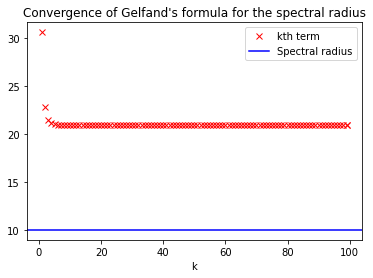

In [18]:
#Compute max(eigenval(C))
from numpy import linalg as la

def kth_term(matrix, k=60):
    """Gelfand's formula"""
    matrix = la.matrix_power(matrix, k)
    f_norm = la.norm(matrix, 'fro')
    term = f_norm**(1.0/k)

    return term


def test_convergence_of_gelfands_formula(matrix):

    for k in range(1, 100):
        term = kth_term(matrix, k)
        print("k={}: {}".format(k, term))
        plt.plot(k, term, 'rx')

    plt.plot(k, term, 'rx', label="kth term")
    plt.title("Convergence of Gelfand's formula for the spectral radius")
    plt.xlabel("k")
    plt.axhline(y=10, color='b', linestyle='-', label='Spectral radius')
    plt.legend()
    plt.show()
    return term
  
#df_imatrix.drop(columns=['Unnamed: 0']).values
max_eigenval = test_convergence_of_gelfands_formula(df_imatrix.drop(columns=['Unnamed: 0']).values)

In [19]:
def SIR_eq(INPUT,t, BETA,  gamma):
    
    # NB:  S = INPUT[ :16], I = INPUT[16:32], A = INPUT[32:]

    Y=np.zeros((48)) # Initialize a new array of zeros to store the results
    
    S,I,R = INPUT[:16], INPUT[16:32], INPUT[32:]
    
    k= 16
    
    # Start storing the results by applying matrix multiplication and adapting to the SIR setting

    for i in range(k):
        SUM = np.dot(BETA[i], I/(N*n)) * S[i]
        Y[i] = (-1)* SUM
        Y[(k+i)] = SUM - gamma * I[i]
        Y[(2*k+i)] = gamma * I[i]

    return Y

In [20]:
n = df_age_distro_grouped.values/NORMALIZE # Proportion of the population in each class

N = initial_pops['MB'] # Total population

S = (N - 1) * n
I = np.array([0]*(len(df_age_distro_grouped)-1) + [1])
R = np.array([0]*16)

INPUT = np.hstack((S,I,R))

t = t_days_linspaced['MB'] # Number of days we need to take into account for calibration

d = 14 # Assumption on average infectious period

gamma = 1/d # Recovery rate, as the inverse of average infectious period

R0s = np.arange(1, 6, 0.005) # Allow for a wide range of R0s

results = pd.DataFrame(np.zeros((len(R0s),48)), columns = [i for i in range(48)]) # Initial empty matrix where we store results
counter = 0 # A counter that is used to store

MSEs = []  # Store all MSEs
I_hats = [] # store all the I_daily of the model that you test
Qs = [] # Store all the Qs

for R0 in R0s: # Iterate over R0s
    
    q = R0 * gamma / max_eigenval
    BETA = q * df_imatrix.drop(columns=['Unnamed: 0']).values
    Qs.append(q)
    
    RES = odeint(SIR_eq, INPUT ,t, args=(BETA,gamma))
    S, I_hat, R = RES.T[:16], RES.T[16:32], RES.T[32:]
    
    I_daily = (I_hat.sum(axis = 0)[1:] + R.sum(axis = 0)[1:]) - (I_hat.sum(axis = 0)[:-1] + R.sum(axis = 0)[:-1])
    I_hats.append(I_daily)

    true_data = df_provinces['MB'][:len(I_daily)]
    
    MSE = np.sqrt(sum((I_daily-true_data)**2)/len(true_data))
    MSEs.append(MSE)
    
    
results = pd.DataFrame(np.vstack((np.array(R0s), np.array(MSEs), np.array(Qs))).T).rename(columns={0:'R0', 1:'MSE',2:'q'})
results[results['MSE'] == np.min(results['MSE'])] # Compute the one that gives the lowest RMSE

,R0,MSE,q
319,2.595,4.030008,0.00887


In [21]:
store = results[results['MSE'] == np.min(results['MSE'])] # Store the one that gives the lowest RMSE

In [22]:
t = np.arange(1, 250, 1)  # A longer time-span

q = list(store['q'])[0]   # The best q we get from calibration

BETA = q * df_imatrix.drop(columns=['Unnamed: 0']).values  # BETA parameter

RES = odeint(SIR_eq, INPUT ,t, args=(BETA,gamma)) # Run the model

S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16=RES.T

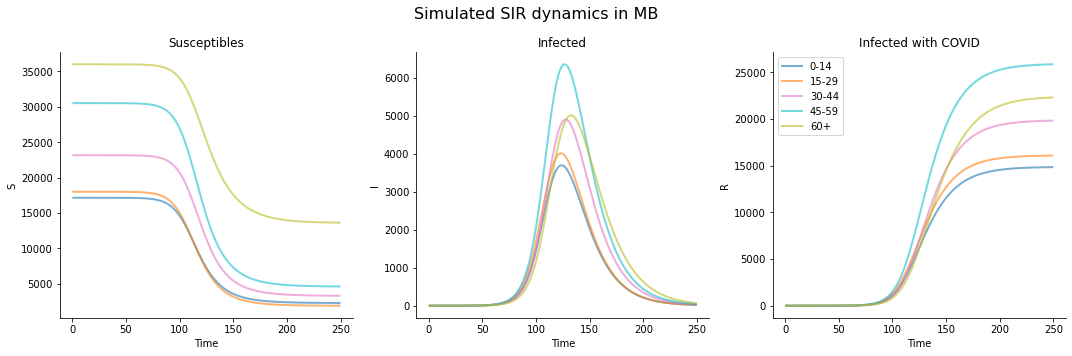

In [23]:
# PLOT
fig, axs = plt.subplots(nrows=1, ncols=3, facecolor='w', figsize=(15,5))
fig.suptitle('Simulated SIR dynamics in MB', fontsize=16)

ax = axs[0]
ax.set_title('Susceptibles')
ax.plot(t, S1+S2+S3, 'tab:blue', alpha=0.6, lw=2)
ax.plot(t, S4+S5+S6, 'tab:orange', alpha=0.6, lw=2)
ax.plot(t, S7+S8+S9, 'tab:pink', alpha=0.6, lw=2)
ax.plot(t, S10+S11+S12, 'tab:cyan', alpha=0.6, lw=2)
ax.plot(t, S13+S14+S15+S16, 'tab:olive', alpha=0.6, lw=2)
ax.set_xlabel('Time')
ax.set_ylabel('S')

   
ax = axs[1]
ax.set_title('Infected')
ax.plot(t, I1+I2+I3, 'tab:blue', alpha=0.6, lw=2)
ax.plot(t, I4+I5+I6, 'tab:orange', alpha=0.6, lw=2)
ax.plot(t, I7+I8+I9, 'tab:pink', alpha=0.6, lw=2)
ax.plot(t, I10+I11+I12, 'tab:cyan', alpha=0.6, lw=2)
ax.plot(t, I13+I14+I15+I16, 'tab:olive', alpha=0.6, lw=2)
ax.set_xlabel('Time')
ax.set_ylabel('I')

ax = axs[2]
ax.set_title('Infected with COVID')
ax.plot(t, R1+R2+R3, 'tab:blue', alpha=0.6, lw=2, label= '0-14')
ax.plot(t, R4+R5+R6, 'tab:orange', alpha=0.6, lw=2, label= '15-29')
ax.plot(t, R7+R8+R9, 'tab:pink', alpha=0.6, lw=2, label= '30-44')
ax.plot(t, R10+R11+R12, 'tab:cyan', alpha=0.6, lw=2, label= '45-59')
ax.plot(t, R13+R14+R15+R16, 'tab:olive', alpha=0.6, lw=2, label= '60+')

ax.legend()

ax.set_xlabel('Time')
ax.set_ylabel('R')

#ax.legend(loc="upper right", fontsize=9, frameon=False, title = 'N° partner') # upper left corner
fig.tight_layout()
for aa in range(3):
    ax = axs[aa]
    for spine in ('top', 'right'): 
        ax.spines[spine].set_visible(False)


These graphs, plotting different batches of 15-years groups, can be misleading. In fact, these are absolute numbers and we are taking into account groups that can be more 'populated' than others. Let's see first the aggregate and then switch to a proportional model.

Text(0, 0.5, 'Number of people')

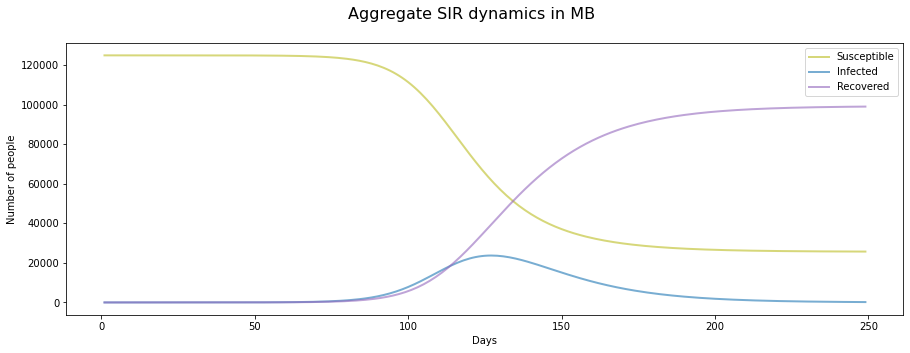

In [24]:
# PLOT

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Aggregate SIR dynamics in MB', fontsize=16)

ax.plot(t, S1+S2+S3+S4+S5+S6+S7+S8+S9+S10+S11+S12+S13+S14+S15+S16, 'tab:olive', alpha=0.6, lw=2, label = 'Susceptible')
ax.plot(t, I1+I2+I3+I4+I5+I6+I7+I8+I9+I10+I11+I12+I13+I14+I15+I16, 'tab:blue', alpha=0.6, lw=2, label = 'Infected')
ax.plot(t, R1+R2+R3+R4+R5+R6+R7+R8+R9+R10+R11+R12+R13+R14+R15+R16, 'tab:purple', alpha=0.6, lw=2, label = 'Recovered')

ax.legend()
ax.set_xlabel('Days')
ax.set_ylabel('Number of people')

To answer the question about which are the age groups that are infected the most, we have to normalize the age groups and see how the infected compartment behaves.

In [25]:
RES_df = pd.DataFrame(RES)
RES_df = RES_df.iloc[:,16:32].rename(columns={i+16: val for i,val in enumerate(df_age_distro_grouped.index.values)})

In [26]:
for idx in df_age_distro_grouped.index.values:
    RES_df[idx] = RES_df[idx].apply(lambda x : x/df_age_distro_grouped[idx])
RES_df

,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,70-75,75+
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000010
1,3.551719e-08,4.275414e-08,3.553530e-08,3.870584e-08,3.716077e-08,5.965585e-08,2.404090e-08,4.121184e-08,4.827865e-08,5.388725e-08,4.789273e-08,8.301207e-08,8.926666e-08,6.265227e-08,4.774783e-08,0.000009
2,7.176177e-08,8.775249e-08,7.605749e-08,8.313919e-08,7.746017e-08,1.188840e-07,5.150423e-08,8.498149e-08,9.883918e-08,1.074667e-07,9.763482e-08,1.629114e-07,1.737990e-07,1.220037e-07,9.296154e-08,0.000009
3,1.089583e-07,1.353752e-07,1.222284e-07,1.340885e-07,1.211055e-07,1.782246e-07,8.244530e-08,1.315410e-07,1.519993e-07,1.612384e-07,1.496588e-07,2.403941e-07,2.544277e-07,1.785665e-07,1.360291e-07,0.000008
4,1.473489e-07,1.860358e-07,1.747879e-07,1.924387e-07,1.683465e-07,2.382240e-07,1.169612e-07,1.811594e-07,2.081157e-07,2.157142e-07,2.044405e-07,3.161536e-07,3.319620e-07,2.328422e-07,1.773304e-07,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,3.423235e-04,2.102937e-04,9.415557e-05,7.535464e-05,2.381286e-04,2.558612e-04,2.898482e-04,2.506945e-04,2.228022e-04,2.600534e-04,1.951998e-04,2.692987e-04,2.939167e-04,3.557285e-04,3.415067e-04,0.000338
245,3.267101e-04,2.002439e-04,8.940972e-05,7.151300e-05,2.268714e-04,2.438263e-04,2.763645e-04,2.389007e-04,2.122407e-04,2.478917e-04,1.858773e-04,2.567361e-04,2.803294e-04,3.396511e-04,3.261725e-04,0.000323
246,3.118011e-04,1.906760e-04,8.490665e-05,6.787058e-05,2.161469e-04,2.323571e-04,2.635050e-04,2.276618e-04,2.021812e-04,2.362971e-04,1.770013e-04,2.447579e-04,2.673668e-04,3.242893e-04,3.115138e-04,0.000309
247,2.975653e-04,1.815669e-04,8.063373e-05,6.441684e-05,2.059300e-04,2.214271e-04,2.512411e-04,2.169517e-04,1.925998e-04,2.252432e-04,1.685504e-04,2.333371e-04,2.550003e-04,3.096120e-04,2.975017e-04,0.000295


In [27]:
G1 = RES_df.iloc[:,0] + RES_df.iloc[:,1] + RES_df.iloc[:,2]
G2 = RES_df.iloc[:,4] + RES_df.iloc[:,5] + RES_df.iloc[:,3]
G3 = RES_df.iloc[:,7] + RES_df.iloc[:,8] + RES_df.iloc[:,6]
G4 = RES_df.iloc[:,9] + RES_df.iloc[:,10] + RES_df.iloc[:,11]
G5 = RES_df.iloc[:,12] + RES_df.iloc[:,13]
G6 = RES_df.iloc[:,14]+ RES_df.iloc[:,15]

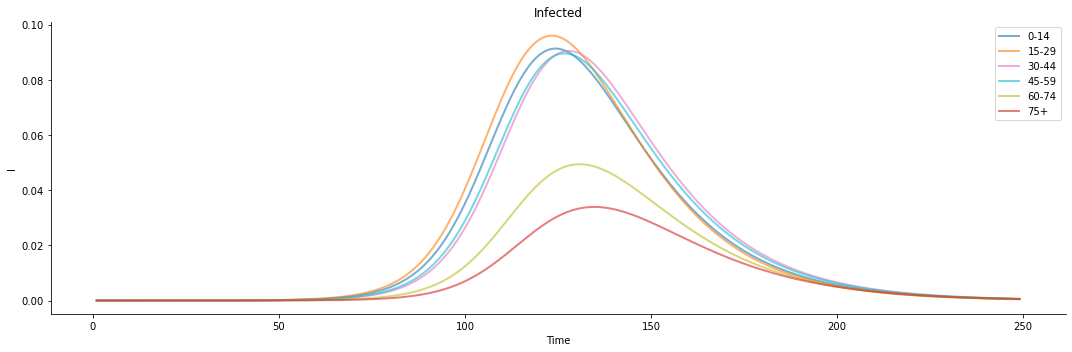

In [28]:
# PLOT
fig, axs = plt.subplots(nrows=1, ncols=1, facecolor='w', figsize=(15,5))
   
ax = axs
ax.set_title('Infected')
ax.plot(t, G1, 'tab:blue', alpha=0.6, lw=2, label = '0-14')
ax.plot(t, G2, 'tab:orange', alpha=0.6, lw=2, label = '15-29')
ax.plot(t, G3, 'tab:pink', alpha=0.6, lw=2, label = '30-44')
ax.plot(t, G4, 'tab:cyan', alpha=0.6, lw=2, label = '45-59')
ax.plot(t, G5, 'tab:olive', alpha=0.6, lw=2, label = '60-74')
ax.plot(t, G6, 'tab:red', alpha=0.6, lw=2, label = '75+')
ax.set_xlabel('Time')
ax.set_ylabel('I')

ax.legend()


#ax.legend(loc="upper right", fontsize=9, frameon=False, title = 'N° partner') # upper left corner
fig.tight_layout()
for spine in ('top', 'right'):
    ax.spines[spine].set_visible(False)

With this graph of normalized population, we can see that there is some sort of trend: the younger the age group, the more infected it can be. In doing this, we are probably generalizing too much as age groups in this plot comprise 15-years groups and we might be missing on some particular trends that might have arose. 

# Exercise 3

<AxesSubplot:>

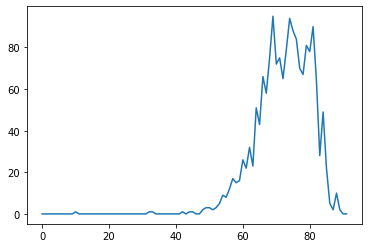

In [29]:
df_provinces['MB'].plot()

In [30]:
#Identify the peak of the cases
row = df_provinces['MB'][df_provinces['MB']==np.max(df_provinces['MB'])]
print(f'Maximum of new infected reached at day {row.index.values[0]}, number of cases: {row.values[0]}')
#Might change this later on

Maximum of new infected reached at day 69, number of cases: 95


In [31]:
def plot_res(tt):
    fig, axs = plt.subplots(nrows=1, ncols=3, facecolor='w', figsize=(15,5))
    ax = axs[0]
    ax.set_title('Susceptibles')
    ax.plot(tt, S1, 'r', alpha=0.6, lw=2)
    ax.plot(tt, S2, 'g', alpha=0.6, lw=2)
    ax.plot(tt, S3, 'b', alpha=0.6, lw=2)
    ax.plot(tt, S4, 'k', alpha=0.6, lw=2)
    ax.plot(tt, S5, 'r', alpha=0.6, lw=2)
    ax.plot(tt, S6, 'r', alpha=0.6, lw=2)
    ax.plot(tt, S7, 'b', alpha=0.6, lw=2)
    ax.plot(tt, S8, 'k', alpha=0.6, lw=2)
    ax.plot(tt, S9, 'r', alpha=0.6, lw=2)
    ax.plot(tt, S10, 'r', alpha=0.6, lw=2)
    ax.plot(tt, S11, 'b', alpha=0.6, lw=2)
    ax.plot(tt, S12, 'k', alpha=0.6, lw=2)
    ax.plot(tt, S13, 'r', alpha=0.6, lw=2)
    ax.plot(tt, S14, 'r', alpha=0.6, lw=2)
    ax.plot(tt, S15, 'r', alpha=0.6, lw=2)
    ax.set_xlabel('Time')
    ax.set_ylabel('S')

    ax = axs[1]
    ax.set_title('Infected with COVID')
    ax.plot(tt, I1, 'r', alpha=0.6, lw=2)
    ax.plot(tt, I2, 'g', alpha=0.6, lw=2)
    ax.plot(tt, I3, 'b', alpha=0.6, lw=2)
    ax.plot(tt, I4, 'k', alpha=0.6, lw=2)
    ax.plot(tt, I5, 'r', alpha=0.6, lw=2)
    ax.plot(tt, I6, 'g', alpha=0.6, lw=2)
    ax.plot(tt, I7, 'b', alpha=0.6, lw=2)
    ax.plot(tt, I8, 'k', alpha=0.6, lw=2)
    ax.plot(tt, I9, 'r', alpha=0.6, lw=2)
    ax.plot(tt, I10, 'g', alpha=0.6, lw=2)
    ax.plot(tt, I11, 'b', alpha=0.6, lw=2)
    ax.plot(tt, I12, 'k', alpha=0.6, lw=2)
    ax.plot(tt, I13, 'r', alpha=0.6, lw=2)
    ax.plot(tt, I14, 'g', alpha=0.6, lw=2)
    ax.plot(tt, I15, 'b', alpha=0.6, lw=2)
    ax.set_xlabel('Time')
    ax.set_ylabel('I')
    ax = axs[2]
    ax.set_title('Recovered from COVID')
    ax.plot(tt, R1, 'r', alpha=0.6, lw=2, label= '3')
    ax.plot(tt, R2, 'g', alpha=0.6, lw=2, label= '10')
    ax.plot(tt, R3, 'b', alpha=0.6, lw=2, label= '60')
    ax.plot(tt, R4, 'k', alpha=0.6, lw=2, label= '100')
    ax.plot(tt, R5, 'r', alpha=0.6, lw=2, label= '3')
    ax.plot(tt, R6, 'g', alpha=0.6, lw=2, label= '10')
    ax.plot(tt, R7, 'b', alpha=0.6, lw=2, label= '60')
    ax.plot(tt, R8, 'k', alpha=0.6, lw=2, label= '100')
    ax.plot(tt, R9, 'r', alpha=0.6, lw=2, label= '3')
    ax.plot(tt, R10, 'g', alpha=0.6, lw=2, label= '10')
    ax.plot(tt, R11, 'b', alpha=0.6, lw=2, label= '60')
    ax.plot(tt, R12, 'k', alpha=0.6, lw=2, label= '100')
    ax.plot(tt, R13, 'r', alpha=0.6, lw=2, label= '3')
    ax.plot(tt, R14, 'g', alpha=0.6, lw=2, label= '10')
    ax.plot(tt, R15, 'b', alpha=0.6, lw=2, label= '60')
    ax.set_xlabel('Time')
    ax.set_ylabel('A')
    #ax.legend(loc="upper right", fontsize=9, frameon=False, title = 'N° partner') # upper left corner
    fig.tight_layout()
    for aa in range(3):
        ax = axs[aa]
        for spine in ('top', 'right'): 
            ax.spines[spine].set_visible(False)

In [32]:
def SIR_eq(INPUT,t, BETA,  gamma):

    Y=np.zeros((48)) #Preparing the vector of outcomes
    S,I,R = INPUT[:16], INPUT[16:32], INPUT[32:] #Splitting Susceptibles, Infected and Recovered
    k= 16 #Different number of age groups
    for i in range(k): 
        SUM = np.dot(BETA[i], I/(N*n)) * S[i]
        #Compute the differential equations
        Y[i] = (-1)* SUM
        Y[(k+i)] = SUM - gamma * I[i]
        Y[(2*k+i)] = gamma * I[i]

    return Y #Returns a vector of output

$$\frac{\partial{S}}{\partial{t}} = - B I_j S_i$$
$$\frac{\partial{I}}{\partial{t}} = B I_j S_i - \gamma I_j$$
$$\frac{\partial{R}}{\partial{t}} = \gamma I_j$$
where $B$ is defined as $B = q * C$, where $C$ is the contact matrix

In [33]:
#Calibration: RMSE, used to find the best parameter taking the others as fixed

def calibrate_model(time, rang,INPUT,tspan):
    
    stime, etime = time
    R0s = np.arange(rang[0], rang[1], rang[2])
    results = pd.DataFrame(np.zeros((len(R0s),48)), columns = [i for i in range(48)])
    counter = 0

    MSEs = []  # store all MSEs
    I_hats = [] # store all the I_daily of the model that you test
    params = []

    for R0 in R0s:
        param = R0 * gamma / max_eigenval
        BETA = param * df_imatrix.drop(columns=['Unnamed: 0']).values
        params.append(param)

        #YOUR CODE HERE

        # Run the model over time 
        RES = odeint(SIR_eq, INPUT ,tspan, args=(BETA,gamma))
        S, I_hat, R = RES.T[:16], RES.T[16:32], RES.T[32:]

        I_daily = (I_hat.sum(axis = 0)[1:] + R.sum(axis = 0)[1:]) - (I_hat.sum(axis = 0)[:-1] + R.sum(axis = 0)[:-1])
        I_hats.append(I_daily)
        #Get the true data of what is happening
        true_data = df_provinces['MB'][stime:etime]

        MSE = np.sqrt(sum((I_daily-true_data)**2)/len(true_data))
        MSEs.append(MSE)


    results = pd.DataFrame(np.vstack((np.array(R0s), np.array(MSEs), np.array(params))).T).rename(columns={0:'R0', 1:'MSE',2:'param'})
    best_param = results[results['MSE'] == np.min(results['MSE'])]
    return best_param

## First Time Span

Effects are mainly going to be the following: (refer to the relevant government documentation for each)
<ul>
    <li>Masks & Hand sanitizer & 1m Distance</li>
</ul>


In [34]:
#Identify two cutoff periods in which the restrictions are taken in place, here day 69 and day 80
first_cutoff = 50
second_cutoff = 86
t0 = np.arange(1,first_cutoff,1)
t1 = np.arange(first_cutoff,second_cutoff+1,1)
t2 = np.arange(second_cutoff, len(df_provinces['MB'])+1)

S = (N - 1) * n
I = np.array([0]*(len(df_age_distro_grouped)-1) + [1])
R = np.array([0]*16)

INPUT = np.hstack((S,I,R))

In [35]:
#Pipeline the model results to the next model
time = (t0[0], t0[-1])
rang = (0,5,0.05)
best_param = calibrate_model(time,rang, INPUT,t0)
best_param

,R0,MSE,param
41,2.05,0.375579,0.007007


In [36]:
q = best_param['param'].values[0]
BETA = q * df_imatrix.drop(columns=['Unnamed: 0']).values
RES_0 = odeint(SIR_eq, INPUT ,t0, args=(BETA,gamma))
S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16=RES_0.T

<AxesSubplot:>

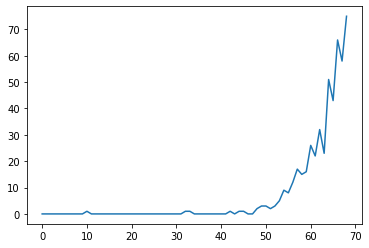

In [37]:
#Good, resembles it well
df_provinces['MB'][:69].plot()

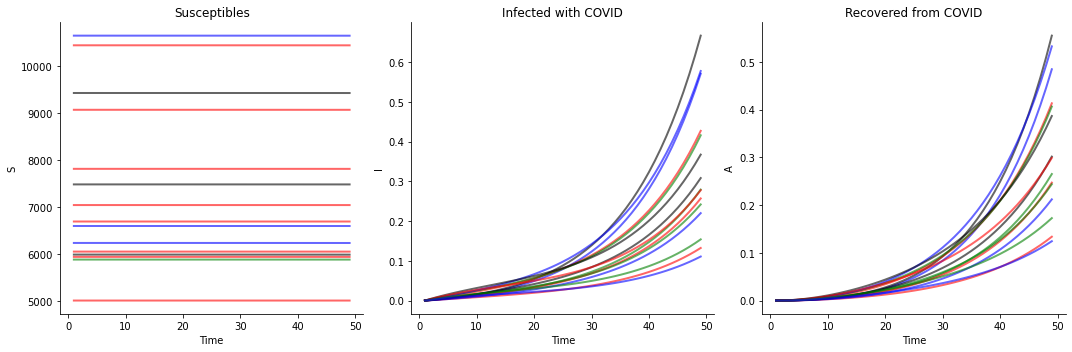

In [38]:
plot_res(t0)

## Second Time Span

Effects are mainly going to be the following: (refer to the relevant government documentation for each)

- Quarantine

In [39]:
#Preparing the last entries, to be taken as inputs to the next model
INPUTS_1 = []
for a in RES_0.T:
    INPUTS_1.append(a[-1])

Now we need to introduce more parameters! Let's say we sum up the effect of masks and hand sanitizer on a new parameter which we will call omega. Show graphically that this is mathematically equivalent to the equation below, by calling $q-\theta=\omega$

In [40]:
time_1 = (t1[0], t1[-1])
rang_1 = (0,5,0.05)
best_param_1 = calibrate_model(time_1, rang_1,INPUTS_1,t1)
best_param_1

,R0,MSE,param
56,2.8,40.9246,0.00957


In [41]:
omega = best_param_1['param'].values[0]
BETA = omega * df_imatrix.drop(columns=['Unnamed: 0']).values
RES_1 = odeint(SIR_eq, INPUTS_1 ,t1, args=(BETA,gamma))
S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16=RES_1[:-1,:].T

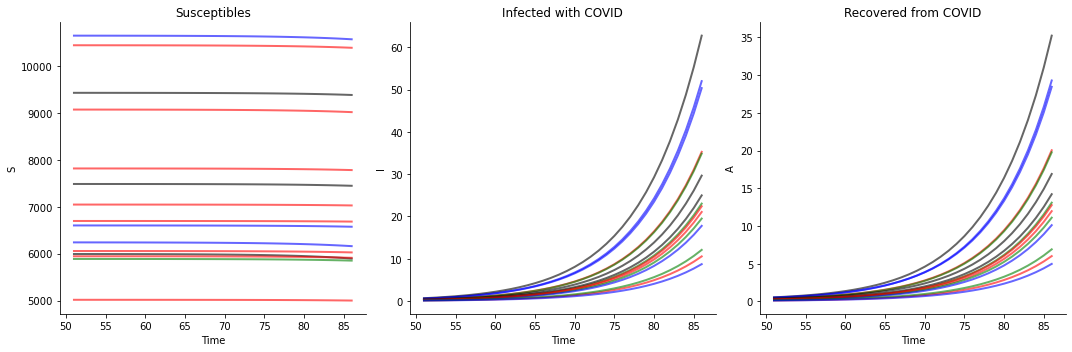

In [42]:
plot_res(t1[1:])

In [43]:
INPUTS_2 = []
for a in RES_1.T:
    INPUTS_2.append(a[-1])

In [44]:
#Now call it psi
time_2 = (t2[0], t2[-1])
rang_2 = (0,5,0.05)
best_param_2 = calibrate_model(time_2, rang_2,INPUTS_2,t2)

In [45]:
extended_timeh = np.arange(time_2[-1],150,1)
psi = best_param_2['param'].values[0]
BETA = psi * df_imatrix.drop(columns=['Unnamed: 0']).values
RES_2 = odeint(SIR_eq, INPUTS_2 ,extended_timeh, args=(BETA,gamma))
S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16=RES_2[:-1,:].T

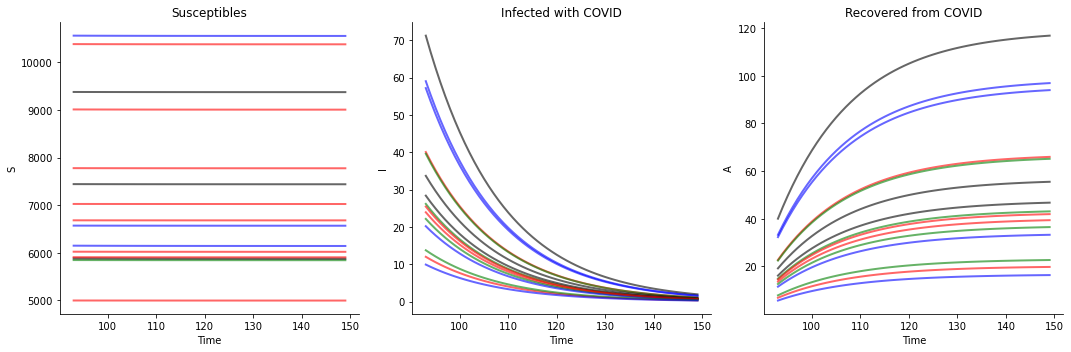

In [46]:
plot_res(extended_timeh[1:])

In [47]:
RES_FINAL = np.vstack((RES_0,RES_1[1:],RES_2[1:]))

In [48]:
S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16=RES_FINAL.T

In [49]:
t = np.arange(1,df_provinces['MB'].shape[0],1)

$$\frac{\partial{S}}{\partial{t}} = - [q - \psi  \unicode{x1D7D9}_{t\geq69} - \theta\unicode{x1D7D9}_{t\geq80}] \mathbf{C} S I$$

$$\frac{\partial{I}}{\partial{t}} = [q - \psi  \unicode{x1D7D9}_{t\geq69} - \theta\unicode{x1D7D9}_{t\geq80}]\ \mathbf{C} S I- \gamma I$$

$$\frac{\partial{R}}{\partial{t}} = \gamma I$$
where $B$ is defined as $B = q * C$, where $C$ is the contact matrix

In [50]:
t_ext_comp = np.arange(1,143,1)

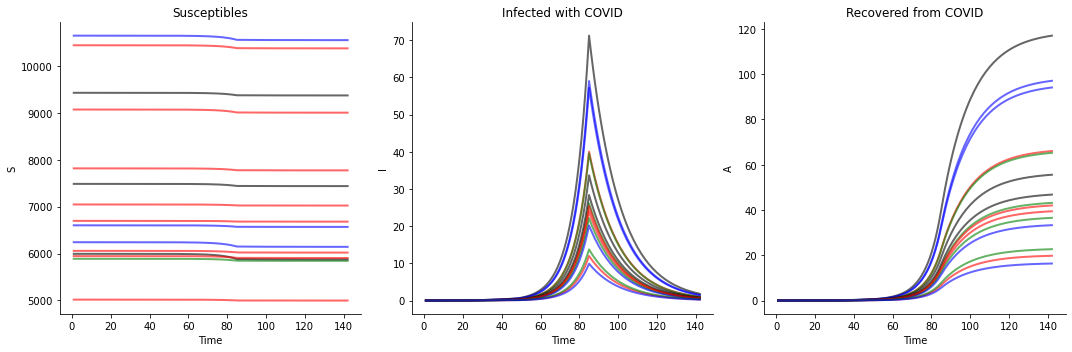

In [51]:
plot_res(t_ext_comp)

# NEW PART - STOCASTICITY

In [52]:
'''
Function used to add stochasticity of individuals going from S -> I
'''
def computeTransitions(popoulation_at_risk, event_rate, time_step):
    n_of_events = np.random.binomial(popoulation_at_risk, event_rate, 1)
    return(n_of_events)

In [53]:
import random
#define beta
begin_masks = 50
begin_quarantine = 86
ndays=200 #masks is 420

gamma = 1/14 # recovery rate
R0=2.59
q = R0 * gamma / max_eigenval
print(f'Value of q computed : {q}')
BETA = q * df_imatrix.drop(columns=['Unnamed: 0']).values
S = (N - 1) * n
I = np.array([0]*16)
I[3] = 1
R = np.array([0]*16)

INPUT = np.hstack((S,I,R))

Value of q computed : 0.008852694674238246


In [54]:
begin_masks = 50
begin_quarantine = 86

In [55]:
#Make a vector of quarantine strength, which is going to be stronger for middle age classes
#Constant effect of quarantine interaction amongst the age groups
'''IMPORTANT - Set the restrictions in the variables below'''
quarantine_strength = np.array([0.1,0.1,0.15,0.20,0.25,0.3,0.35,0.35,0.35,0.35,0.3,0.3,0.2,0.1,0.05,0.05])
mask_effect = 0.6

masks_active = False
quarantine_active = False

def SIR(INPUT, n_days, quarantine=quarantine_active, masks=masks_active, quarantine_strength = quarantine_strength, mask_effect= mask_effect):
    S, I, R= INPUT[:16].reshape((1,16)), INPUT[16:32].reshape((1,16)), INPUT[32:].reshape((1,16))
    time_step = 1 
    t = np.arange(0, ndays, time_step)
    
    for i in t:
        
        S_temp = []
        I_temp = []
        R_temp = []
        
        for j in range(16):
            #function that changes the availability of masks
            LAMBDA = np.dot(BETA[j], I[-1]/(N*n))
            LAMBDA = LAMBDA * random.uniform(mask_effect-0.1, mask_effect+0.1) if (i>=begin_masks) and masks else LAMBDA
            LAMBDA = LAMBDA * quarantine_strength[j] if (i>= begin_quarantine) and quarantine else LAMBDA
            
            if (LAMBDA > 0) & (S[-1][j]>0):
                new_infections = computeTransitions(S[-1][j], LAMBDA, time_step)[0]
                
            elif (LAMBDA<=0) | (S[-1][j]<=0):
                new_infections=0

            # new recoveries are possible only if I>0
            if(I[-1][j]>0):
                new_recoveries = computeTransitions(I[-1][j],gamma,time_step)[0]
            else:
                new_recoveries=0

            # control that new infections do not exceed available susceptibles
            if(new_infections > S[-1][j]):
                new_infections = S[-1][j]

            # control that new recoveries do not exceed available infected individuals
            if(new_recoveries>I[-1][j]):
                new_recoveries = I[-1][j]
                
            S_temp.append(new_infections)
            
            I_temp.append(new_infections - new_recoveries)
            R_temp.append(new_recoveries)
        
        new_arr_S = S[-1] - np.array(S_temp)
        #new_arr_S = S[-1] - np.array(new_infections)
        S= np.concatenate((S, new_arr_S.reshape((1,16))), axis=0)
        
        new_arr_I = I[-1] + np.array(I_temp)
        #new_arr_I = I[-1] + np.array(new_infections) - np.array(new_recoveries)
        I= np.concatenate((I, new_arr_I.reshape((1,16))), axis=0)
        #print(I)
        new_arr_R = R[-1] + np.array(R_temp)
        #new_arr_I = R[-1] + np.array(new_recoveries)
        R= np.concatenate((R, new_arr_R.reshape((1,16))), axis=0)
        #print(R)
                                                          
    return S , I , R 

In [56]:
S,I,R = SIR(INPUT=INPUT,n_days=ndays)

In [57]:
I_T = pd.DataFrame(I)
S_T = pd.DataFrame(S).T

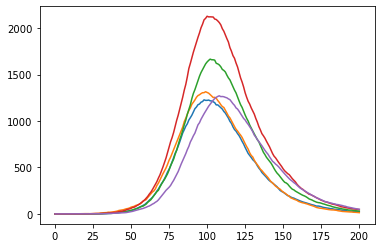

In [58]:
#Plotting the daily infected curves with no restrictions per age group grouped
meanS_0 = np.mean(I_T.iloc[:,:3],axis=1)
meanS_1 = np.mean(I_T.iloc[:,3:6],axis=1)
meanS_2 = np.mean(I_T.iloc[:,6:9],axis=1)
meanS_3 = np.mean(I_T.iloc[:,9:12],axis=1)
meanS_4 = np.mean(I_T.iloc[:,12:],axis=1)
means_grouped = np.vstack((meanS_0,meanS_1,meanS_2,meanS_3,meanS_4))
m_grouped_df = pd.DataFrame(means_grouped.T)
for i in m_grouped_df.columns:
    m_grouped_df[i].plot()

In [59]:
'''
d. We run 50 simulations to se how stochasticity  effects our model output 
'''
nsim=50
Ss = []
Is= []
Rs = []
for isim in range(1,nsim+1):
    sys.stdout.write('\rSimulation n°: {}'.format(isim))
    S,I,R = SIR(INPUT, ndays)
    Ss.append(S)
    Is.append(I)
    Rs.append(R)
print('\nDone!')   

Simulation n°: 50
Done!


In [60]:
'''
e. Compute mean and sd of our simulations
'''

meanS = np.mean(np.mean(Ss, axis=0)[:-1],axis=1)
meanI = np.mean(np.mean(Is, axis=0)[:-1],axis=1)
meanR = np.mean(np.mean(Rs, axis=0)[:-1],axis=1)

sdS = np.mean(np.std(Ss, axis=0, dtype=np.float64)[:-1],axis=1)
sdI = np.mean(np.std(Is, axis=0, dtype=np.float64)[:-1],axis=1)
sdR = np.mean(np.std(Rs, axis=0, dtype=np.float64)[:-1],axis=1)
#Keep just 3 means and 3 standard deviations to be showed in a graph

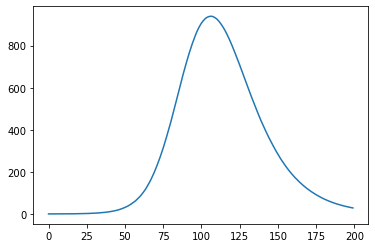

In [61]:
#Average path of the 50 simulations summed up for every age range
for i in pd.DataFrame(meanI).columns:
    pd.DataFrame(meanI)[i].plot()

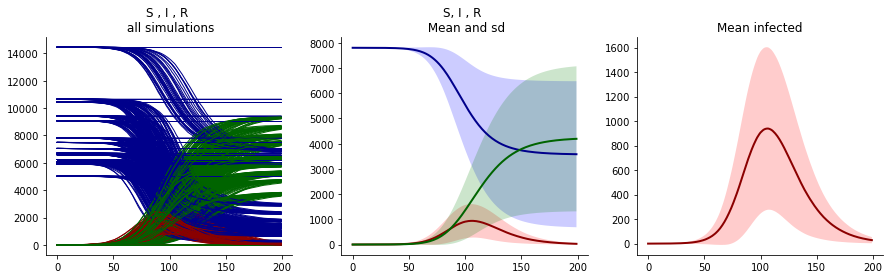

In [62]:
'''
e. Some Plots
'''
t = np.arange(0, ndays, 1)
fig, axs = plt.subplots(1,3, facecolor='w', figsize=(15,4))

axs[0].set_title('S , I , R \n all simulations')
for  S, I, R in zip(Ss, Is, Rs):
    axs[0].plot(t, S[:-1], c = 'darkblue', lw=1)
    axs[0].plot(t, I[:-1], c = 'darkred', lw=1)
    axs[0].plot(t, R[:-1], c = 'darkgreen', lw=1)

axs[1].set_title('S, I , R \n Mean and sd')
axs[1].plot(t, meanS, c = 'darkblue', lw=2, label = 'mean S')
axs[1].plot(t, meanI, c = 'darkred', lw=2, label = 'mean I')
axs[1].plot(t, meanR, c = 'darkgreen', lw=2, label = 'mean R')
axs[1].fill_between(t, meanS+sdS, meanS-sdS, facecolor='blue', alpha=0.2)
axs[1].fill_between(t, meanI+sdI, meanI-sdI, facecolor='r', alpha=0.2)
axs[1].fill_between(t, meanR+sdR, meanR-sdR, facecolor='g', alpha=0.2)
#axs[1].legend(fancybox = True)

axs[2].set_title('Mean infected')
axs[2].plot(t, meanI, c = 'darkred', lw=2, label = 'mean I')
axs[2].fill_between(t, meanI+sdI, meanI-sdI, facecolor='r', alpha=0.2)
#axs[2].legend(fancybox = True)

for i in range(3):
    #axs[i].legend(fancybox = True)
    axs[i].grid(False)
    axs[i].set_facecolor("white")
    for spine in ('top', 'right'): 
        axs[i].spines[spine].set_visible(False)